#### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"/kaggle/input/fast-food-calories-data/fastfood_calories.csv",sep=',',engine='python',encoding='latin1')
data.head(25)

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
5,6,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other
6,7,Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0,Other
7,8,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0,Other
8,9,Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0,Other
9,10,Mcdonalds,Double Quarter PounderÂ® with Cheese,770,400,45,21.0,2.5,175,1290,42,3.0,10,51.0,20.0,6.0,20.0,Other


In [4]:
data.isnull().sum()

Unnamed: 0       0
restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [5]:
len(data)

515

In [6]:
data['salad'].unique()

array(['Other'], dtype=object)

In [7]:
data.columns

Index(['Unnamed: 0', 'restaurant', 'item', 'calories', 'cal_fat', 'total_fat',
       'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber',
       'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object')

In [8]:
data = data.drop(columns=['Unnamed: 0','salad'])

In [9]:
data.dropna(subset=['protein','fiber'],inplace=True)

In [10]:
len(data)

503

In [11]:
data.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber            0
sugar            0
protein          0
vit_a          202
vit_c          198
calcium        198
dtype: int64

##### HANDLING MISSING VALUES

In [12]:
# Specifying the columns you want to fill
columns_to_fill = ['vit_a', 'vit_c', 'calcium']

# Fill null values in the specified columns with the mean
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

In [13]:
data.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
dtype: int64

In [14]:
len(data)

503

In [15]:
data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


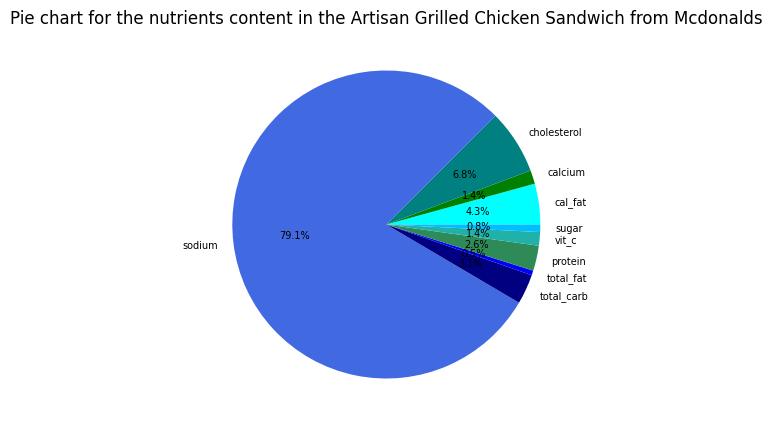

In [16]:
plt.figure(figsize=(5,5))
columns = ['cal_fat', 'calcium', 'cholesterol', 'sodium','total_carb', 'total_fat','protein', 'vit_c', 'sugar']
row = data.loc[0]
colors = ['cyan','green','teal','royalblue','navy','blue','seagreen','lightseagreen','deepskyblue','turqouise','lightblue']
size = {'fontsize': 7}
plt.pie(row[columns], colors=colors, labels=columns, autopct='%1.1f%%',textprops = size)
plt.title("Pie chart for the nutrients content in the Artisan Grilled Chicken Sandwich from Mcdonalds")
plt.show()

In [17]:
data = data.drop(columns = ['item'])

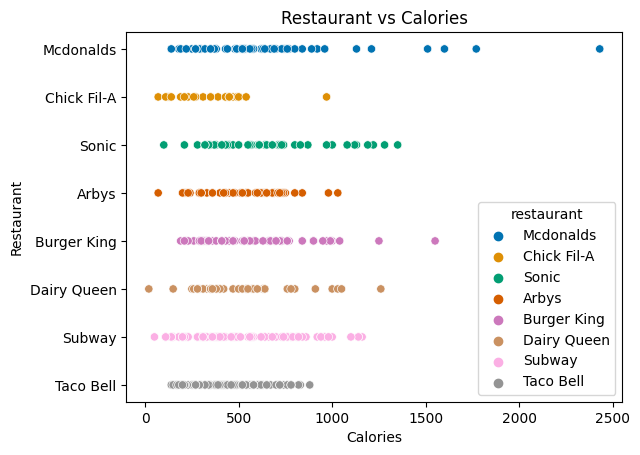

In [18]:
sns.scatterplot(x='calories', y='restaurant', data=data, hue='restaurant', palette='colorblind')

plt.xlabel('Calories')
plt.ylabel('Restaurant')
plt.title('Restaurant vs Calories')

plt.show()

In [19]:
data['restaurant'].unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [20]:
replace = {'Mcdonalds':1, 'Chick Fil-A':2, 'Sonic':3, 'Arbys':4, 'Burger King':5,
       'Dairy Queen':6, 'Subway':7, 'Taco Bell':8}
data['restaurant'] = data['restaurant'].replace(replace)

In [21]:
data['restaurant'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [22]:
data.head()

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,1,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,1,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,1,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,1,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


In [23]:
data.isnull().sum()

restaurant     0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
dtype: int64

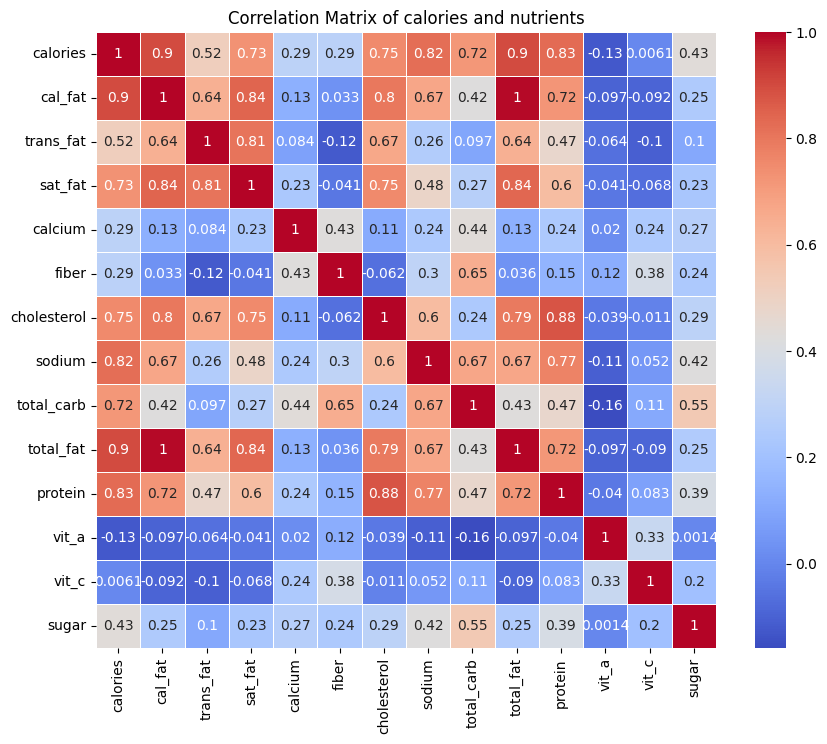

In [24]:
columns_to_plot = ['calories', 'cal_fat', 'trans_fat', 'sat_fat', 'calcium', 'fiber', 'cholesterol', 'sodium','total_carb', 'total_fat','protein', 'vit_a', 'vit_c', 'sugar']
data_to_plot = data[columns_to_plot]
plt.figure(figsize=(10, 8))
sns.heatmap(data_to_plot.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of calories and nutrients')
plt.show()

In [25]:
target = data.calories
target

0       380
1       840
2      1130
3       750
4       920
       ... 
510     780
511     580
512     780
513     720
514     720
Name: calories, Length: 503, dtype: int64

In [26]:
data = data.drop(columns = ['calories'])

In [27]:
data.head()

,restaurant,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,1,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,1,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,1,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,1,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,1,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


#### SPLITTING DATASET INTO TRAINING AND TESTING SETS

In [28]:
train_data, test_data, train_target, test_target = train_test_split(data,target,test_size=0.33,random_state=42)

In [29]:
test_target = test_target.ravel()

#### MODELS

##### DECISION TREES

In [30]:
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(train_data, train_target)
Y_pred = model.predict(test_data)
mse = mean_squared_error(test_target, Y_pred)
rmse = np.sqrt(mse)
rmse

115.86500246053906

##### RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(train_data, train_target)
Y_pred = model.predict(test_data)
mse = mean_squared_error(test_target, Y_pred)
rmse = np.sqrt(mse)
rmse

79.04567651619925

##### GRADIENT BOOSTING

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

model.fit(train_data, train_target)
Y_pred = model.predict(test_data)
mse = mean_squared_error(test_target, Y_pred)
rmse = np.sqrt(mse)
rmse

79.95191909046088